This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data = pd.read_csv('UniversalBank.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

# Verifying if there are any missing values in the dataset
if missing_values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found.")


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
No missing values found.


<Axes: >

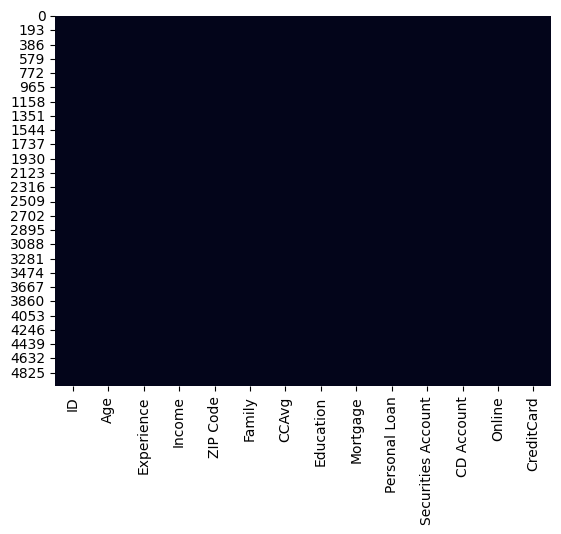

In [ ]:
sns.heatmap(data.isnull(), cbar=False)

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


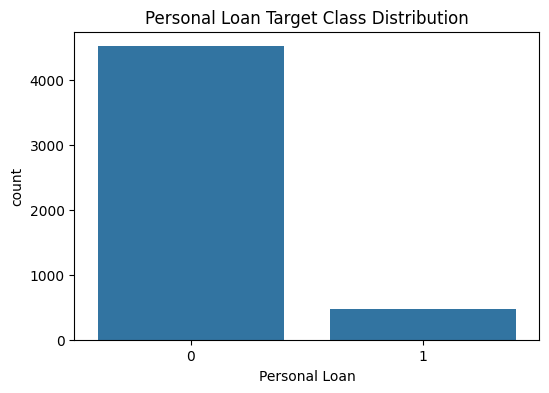

In [ ]:
#Check the distribution of the target variable (Personal Loan)
target_distribution = data['Personal Loan'].value_counts(normalize=True)
print(target_distribution)


plt.figure(figsize=(6,4))
sns.countplot(x='Personal Loan', data=data)
plt.title("Personal Loan Target Class Distribution")
plt.show()


In [ ]:
#Pre-processing
# Dropping unnecessary columns 'ID' and 'ZIP Code'
data = data.drop(columns=['ID', 'ZIP Code'])

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['Education'], drop_first=True)
print(data.head())

   Age  Experience  Income  Family  CCAvg  Mortgage  Personal Loan  \
0   25           1      49       4    1.6         0              0   
1   45          19      34       3    1.5         0              0   
2   39          15      11       1    1.0         0              0   
3   35           9     100       1    2.7         0              0   
4   35           8      45       4    1.0         0              0   

   Securities Account  CD Account  Online  CreditCard  Education_2  \
0                   1           0       0           0        False   
1                   1           0       0           0        False   
2                   0           0       0           0        False   
3                   0           0       0           0         True   
4                   0           0       0           1         True   

   Education_3  
0        False  
1        False  
2        False  
3        False  
4        False  


In [ ]:
# Correlation analysis
correlation = data.corr()['Personal Loan'].sort_values(ascending=False)
print("Correlation with Personal Loan:\n", correlation)

Correlation with Personal Loan:
 Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education_3           0.090212
Education_2           0.071491
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64


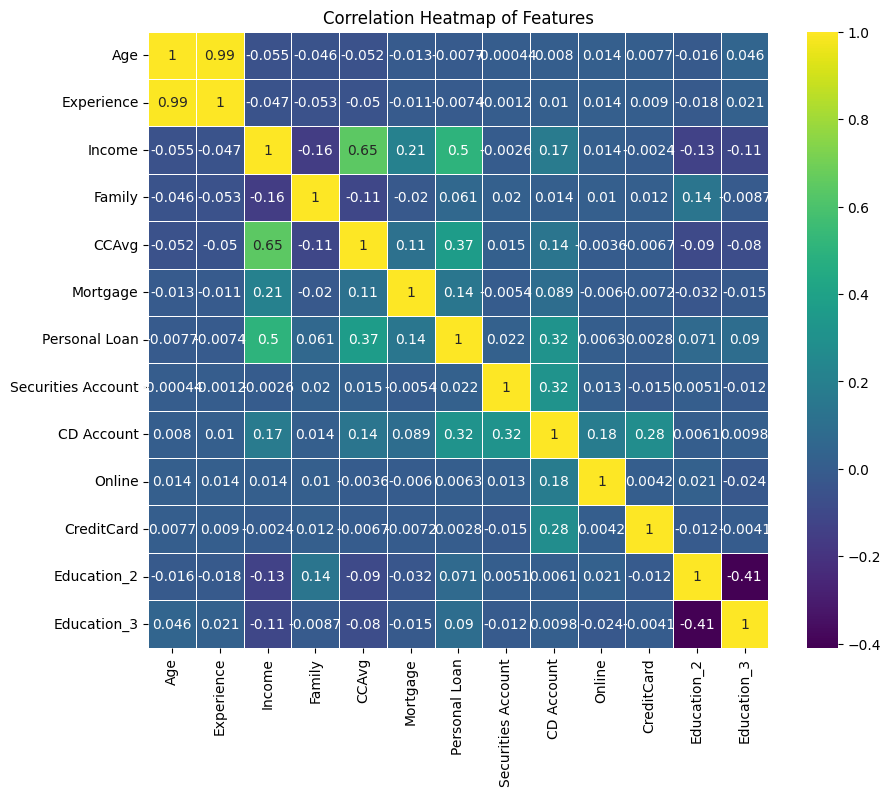

In [ ]:
# Correlation heatmap for all features

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

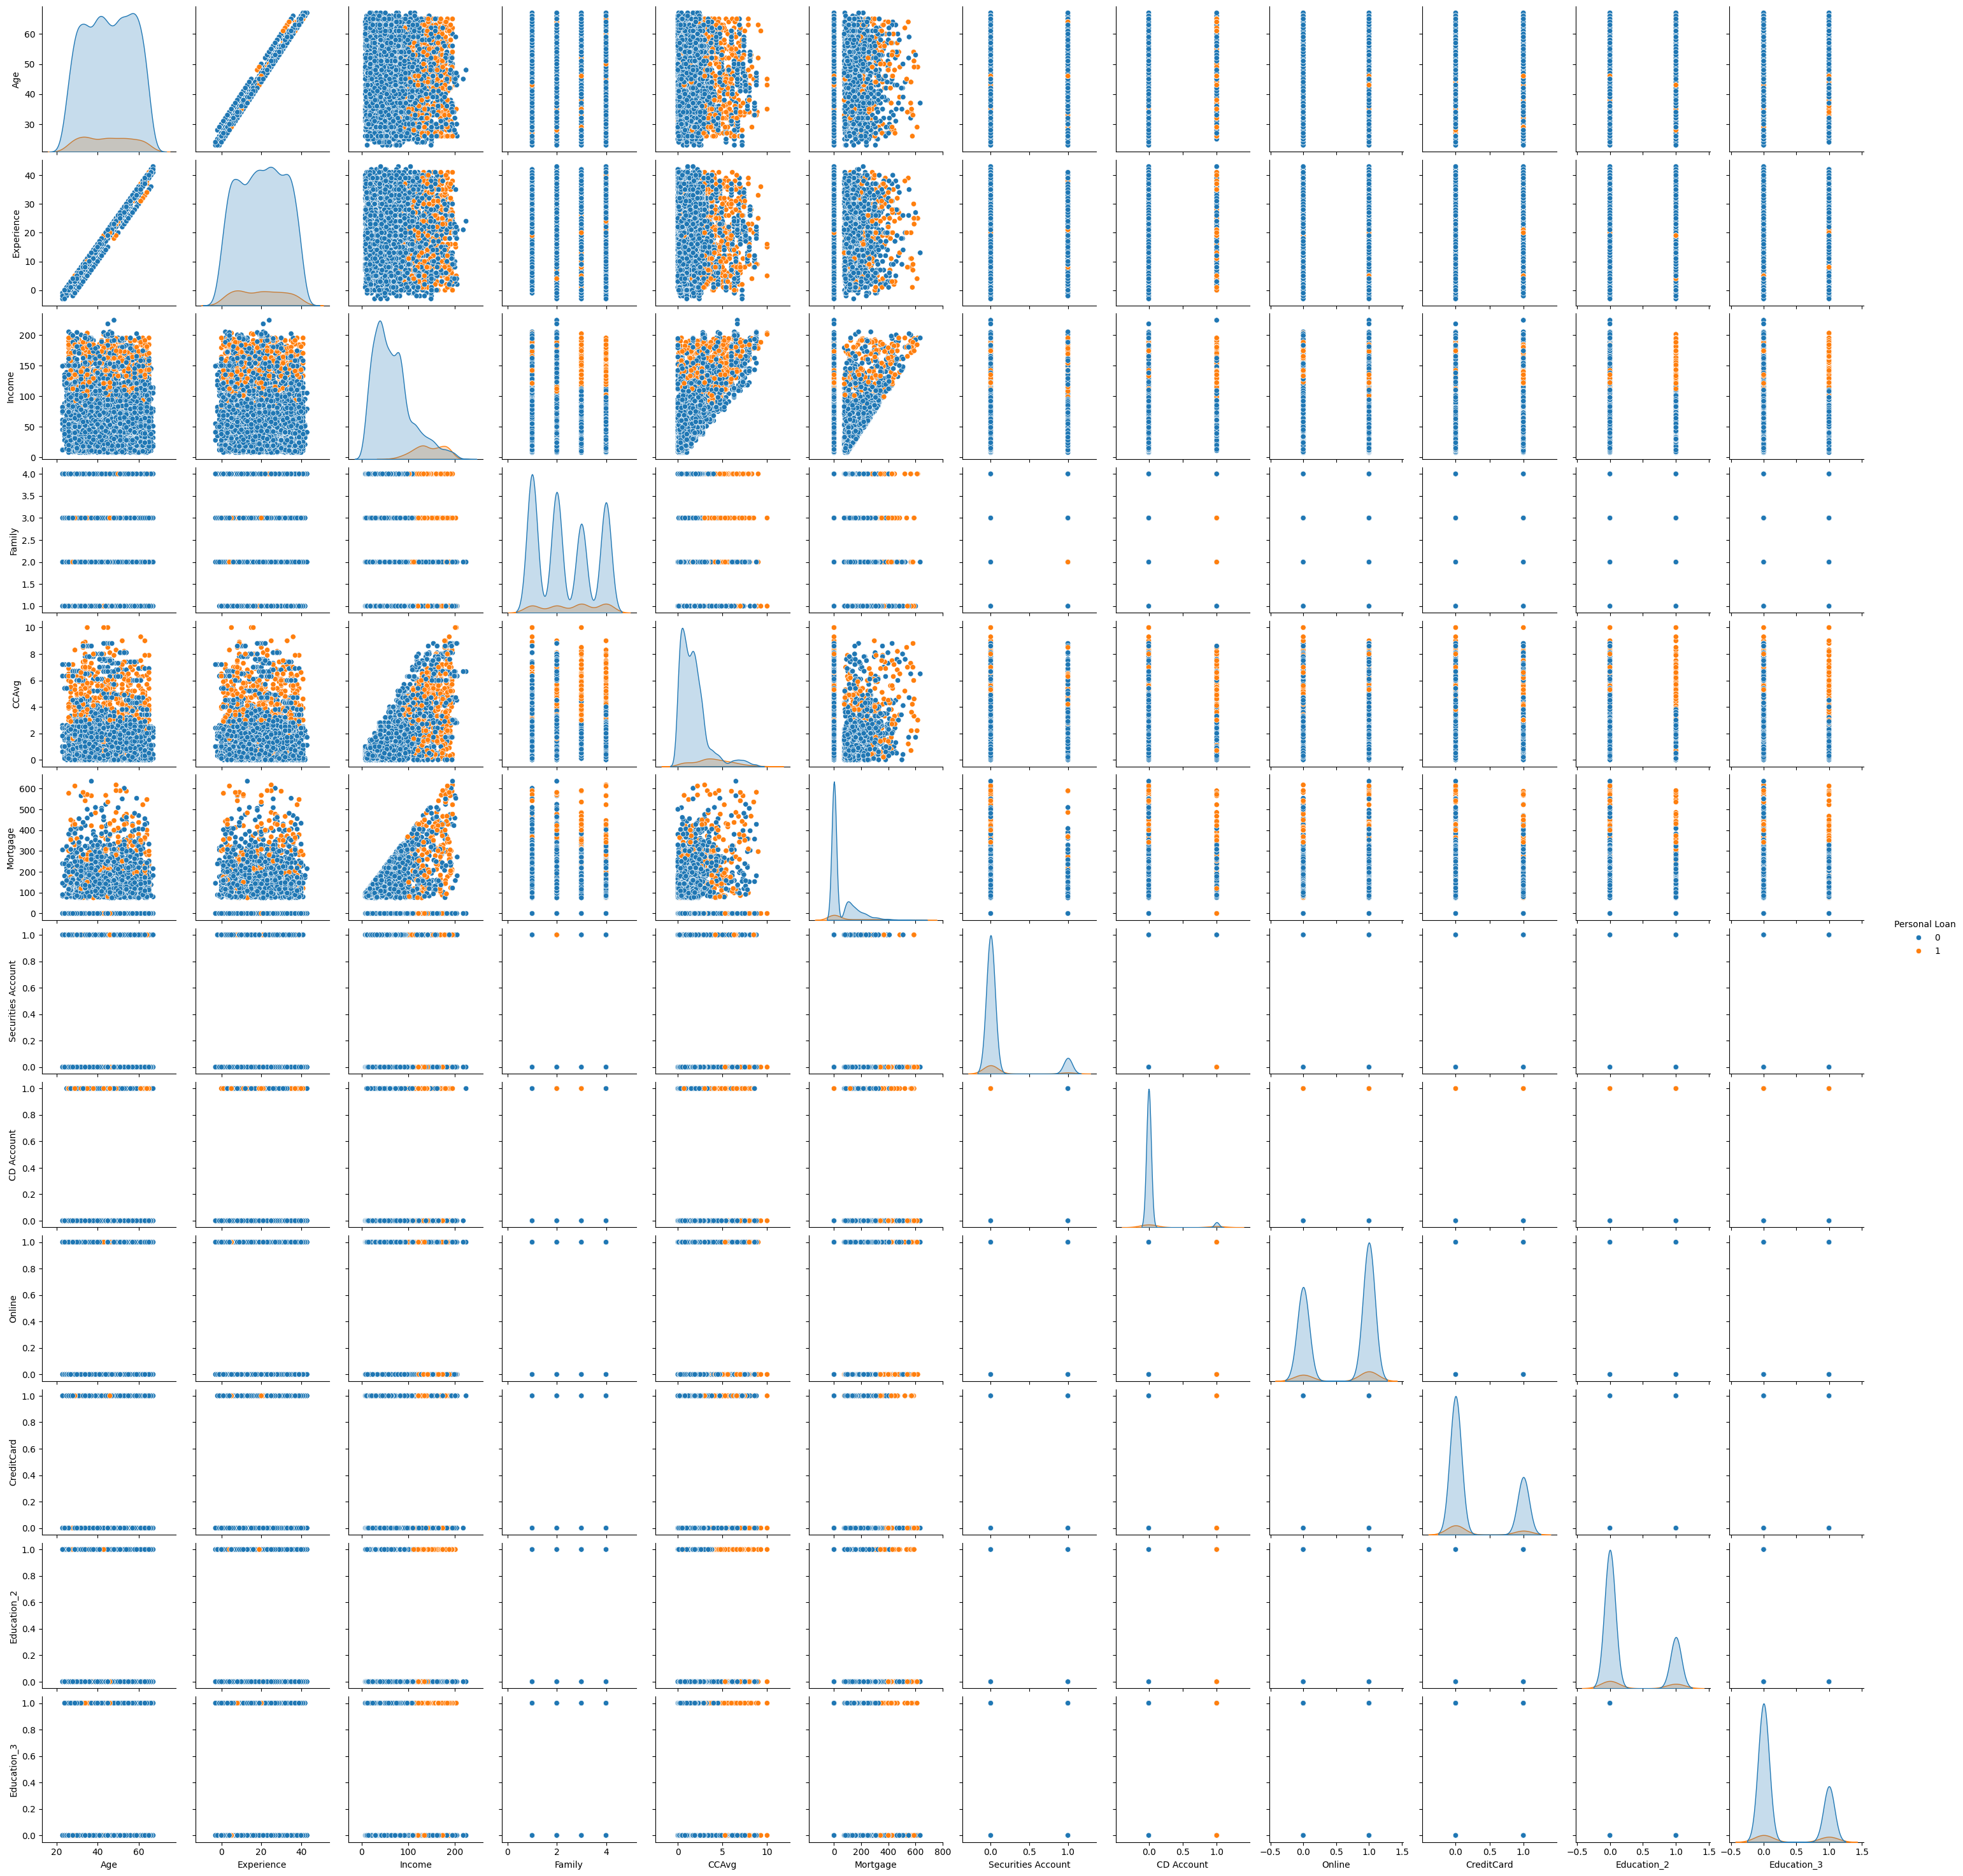

In [ ]:
sns.pairplot(data, hue = 'Personal Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.


In [ ]:
# Split data into training and test sets (70/30 split)

X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Scale data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)

X_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3500.0,0.509896,0.261541,0.0,0.272727,0.500000,0.727273,1.0
Experience,3500.0,0.504391,0.250373,0.0,0.282609,0.500000,0.717391,1.0
Income,3500.0,0.303889,0.213742,0.0,0.143519,0.254630,0.416667,1.0
Family,3500.0,0.465048,0.381885,0.0,0.000000,0.333333,0.666667,1.0
CCAvg,3500.0,0.193431,0.173471,0.0,0.070000,0.150000,0.250000,1.0
Mortgage,3500.0,0.090851,0.162924,0.0,0.000000,0.000000,0.162480,1.0
Securities Account,3500.0,0.104571,0.306044,0.0,0.000000,0.000000,0.000000,1.0
CD Account,3500.0,0.062571,0.242225,0.0,0.000000,0.000000,0.000000,1.0
Online,3500.0,0.591143,0.491693,0.0,0.000000,1.000000,1.000000,1.0
CreditCard,3500.0,0.297429,0.457192,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
# Create an ANN model with one hidden layer of 20 nodes

model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=20, random_state=1)

In [ ]:
#  Assess Model Performance

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
[[1338   13]
 [  77   72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.48      0.62       149

    accuracy                           0.94      1500
   macro avg       0.90      0.74      0.79      1500
weighted avg       0.94      0.94      0.93      1500


ROC AUC Score: 0.9467011758627714


8. Assess the effect of the number of hidden nodes (5-30) on model ROC AUC.
9. Identify optimal number of nodes.



In [ ]:
from sklearn.metrics import accuracy_score

accuracies = []

for nodes in range(5, 30):
    model = MLPClassifier(hidden_layer_sizes=nodes, activation='logistic', solver='adam', random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

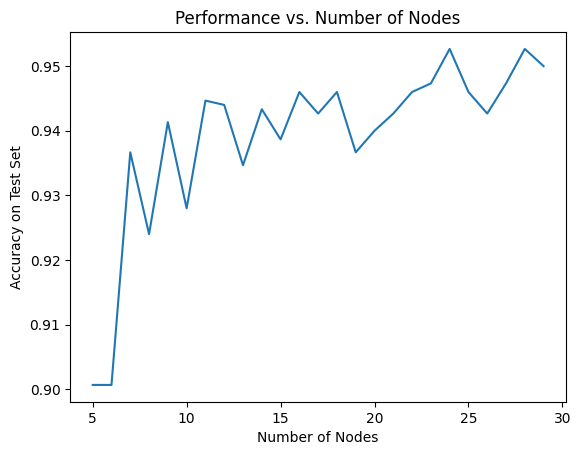

In [ ]:
plt.plot(range(5, 30), accuracies)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy on Test Set')
plt.title('Performance vs. Number of Nodes')
plt.show()

In [ ]:
# Identify optimal number of nodes

optimal_nodes = range(5, 30)[accuracies.index(max(accuracies))]
print(f"Optimal number of nodes: {optimal_nodes}")

Optimal number of nodes: 24
